# Exploring Why Civil Resistance Works

In this assignment, we will replicate some of the findings of a well-received book, [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erical Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan. The two authors examined whether nonviolent campaigns are more effective than violent campaigns. They found that yes; from a data set containing details of campaigns from 1900 onwards, they found that in general peaceful campaigns are more effective in achieving their aims than violent ones.

Following the initial publication of the book in 2011, Erica Chenoweth continued her research on the topic and published a follow-up ten years later, [Civil Resistance: What Everyone Needs to Know](https://www.ericachenoweth.com/research/civil-resistance-what-everyone-needs-to-know). She has also continued to update the data used for her research.

The research became famous for propising the 3.5% rule: "the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event"; you can find a nice overview at [Questions, Answers, and Some Cautionary
Updates Regarding the 3.5% Rule](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf). Among other things, you will investigate that rule.

To answer the questions, we will use that data, the [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.2 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0UZOTX). We will also use data from the [Polity Project](https://www.systemicpeace.org/polityproject.html), in particular the Polity5 version, available from [Integrated Network for Societal Conflict Research (INSCR) ](https://www.systemicpeace.org/inscrdata.html), in particular the [Polity5 Annual Time-Series, 1946-2018](http://www.systemicpeace.org/inscr/p5v2018.xls).

---

> Marsid Mali<br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8200226@aueb.gr

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Exploration of Historical Trends

***Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.***

In [2]:
navco = pd.read_excel('data/NAVCO 1.2 Updated.xlsx')
navco.head(5)

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,...,0,613,10000.0,0.000641,1,1,NaN,1.0,1,1
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,...,0,3281,10000.0,0.000685,1,0,NaN,1.0,0,1
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,...,0,1370,20000.0,0.000893,1,0,NaN,1.0,0,0
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,...,0,4391,60000.0,0.001625,1,1,NaN,1.0,1,0
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,0,442,300000.0,0.091068,1,0,0.0,1.0,1,0


- To facilitate our analysis conducted on a decade basis, we will introduce a `DECADE` column. This column will contain the corresponding decade in which a campaign took place.

In [3]:
navco['DECADE'] = ((navco['EYEAR'] // 10) * 10).astype(int)

- Now in order to make the stacked plot we will create a pivot table that sums the number of non-violent and violent campaigns by decade.

In [4]:
camp_frequency = pd.pivot_table(navco, index='DECADE', values=['NONVIOL', 'VIOL'], aggfunc='sum')
camp_frequency.T

DECADE,1940,1950,1960,1970,1980,1990,2000,2010
NONVIOL,2,9,8,13,30,36,37,34
VIOL,12,25,21,27,17,54,23,41


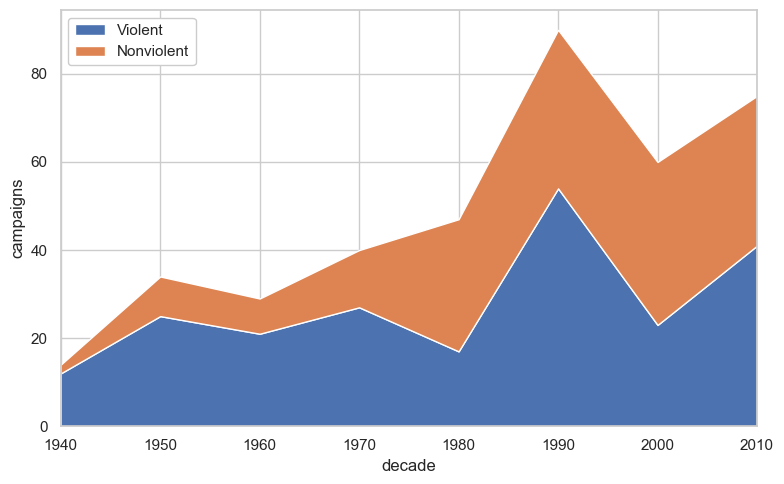

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))  
plt.stackplot(camp_frequency.index, camp_frequency.VIOL, camp_frequency.NONVIOL, alpha=1, edgecolor='white',labels=['Violent','Nonviolent'])
plt.xlabel('decade')
plt.ylabel('campaigns')
plt.legend(loc='upper left').get_frame().set_alpha(1)
plt.margins(x=0)
plt.tight_layout()

- We can observe that there has been a significant increase(with some fluctuations) in both nonviolent and violent civil campaigns over the decades, reflecting the global rise in social and political activism.

- From the 1940s through the 1970s, violent civil campaigns outpaced nonviolent ones by a significant margin.This could be related to the global context of the time, which included World War II and the start of the Cold War, periods associated with violence.

- The 1980s marked a turning point where the number of nonviolent campaigns exceeded that of violent ones.This shift might be due to the growing recognition of the effectiveness of nonviolent resistance, exemplified by the success of movements like the Polish Solidarity movement and the anti-apartheid struggle in South Africa.

- The 1990s saw a peak in both nonviolent and violent campaigns, with violent ones outnumbering nonviolent ones again. This could be linked to the numerous conflicts following the end of the Cold War(etc. Yugoslav Wars).

- In the 2000s and 2010s, the number of nonviolent campaigns remained relatively stable, while the number of violent campaigns decreased and then increased. The decrease in the 2000s might be related to the global push towards peace and democracy, while the increase in the 2010s could be linked to the Arab Spring and other uprisings.

***Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics.***

- To creat this plot we will filter the dataframe for nonviolent events, then group by 'DECADE' and calculate the sum of 'SUCCESS' and 'NONVIOL' for each decade. 
- Finally, we create a new column 'SUCCESS_RATE' that represents the ratio of successful nonviolent campaigns to the total number of nonviolent campaigns in each decade.

In [6]:
nonviolent_success = navco[navco['NONVIOL'] == 1].groupby('DECADE').agg({'SUCCESS': 'sum', 'NONVIOL': 'sum'}).reset_index()
nonviolent_success['SUCCESS_RATE'] = (nonviolent_success['SUCCESS'] / nonviolent_success['NONVIOL'])
nonviolent_success

,DECADE,SUCCESS,NONVIOL,SUCCESS_RATE
0,1940,1,2,0.500000
1,1950,2,9,0.222222
2,1960,2,8,0.250000
3,1970,7,13,0.538462
4,1980,14,30,0.466667
5,1990,30,36,0.833333
6,2000,25,37,0.675676
7,2010,13,34,0.382353


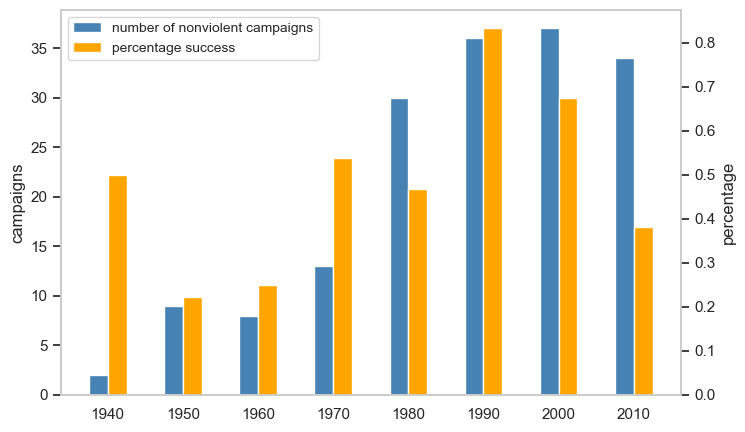

In [7]:
width = 2.5
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()
ax1.bar(nonviolent_success['DECADE'] - width/2, nonviolent_success['NONVIOL'], width, color='steelblue',label='number of nonviolent campaigns')
ax2.bar(nonviolent_success['DECADE'] + width/2, nonviolent_success['SUCCESS_RATE'], width, color='orange', label='percentage success')
fig.legend(loc='upper left', bbox_to_anchor=(0.125, 0.88), fontsize=10)
ax1.set_ylabel('campaigns')
ax2.set_ylabel('percentage')
ax1.grid(False)
ax2.grid(False)

From the 1940s to the 1990s, there's a clear increase in the success rate of nonviolent campaigns, peaking in the 1990s. But success rates for all revolutions have since then declined. The decline in the success rate of civil resistance movements can be attributed to a combination of factors. On one hand, governments have become more adept at suppressing nonviolent challenges through tactics like infiltration and provocation. The absence of strong global advocates for human rights, like the United States, has also played a role. However, the effectiveness of movements has also been affected by internal factors. Contemporary movements tend to have smaller participation rates and focus primarily on mass demonstrations, neglecting other impactful tactics. The reliance on digital organizing, while beneficial for mobilization, can hinder long-term organization and make movements vulnerable to surveillance and misinformation. Moreover, the tolerance or embrace of violence within nonviolent movements reduces their overall effectiveness. For more detailed information and insights into the evolution and potential future of nonviolent resistance, please refer to the original article ['The Future of Nonviolent Resistance'](https://www.journalofdemocracy.org/articles/the-future-of-nonviolent-resistance-2/) by Erica Chenoweth, published in the Journal of Democracy.

***Create a plot showing the success rate for violent and nonviolent campaigns by decade. Your plot should show that nonviolent campaigns have higher success probabilities***

- We do the same process we did before but now for violent capaigns.

In [8]:
viol_success = navco[navco['VIOL'] == 1].groupby('DECADE').agg({'SUCCESS': 'sum', 'VIOL': 'sum'}).reset_index()
viol_success['SUCCESS_RATE'] = (viol_success['SUCCESS'] / viol_success['VIOL'])
viol_success

,DECADE,SUCCESS,VIOL,SUCCESS_RATE
0,1940,6,12,0.500000
1,1950,8,25,0.320000
2,1960,4,21,0.190476
3,1970,12,27,0.444444
4,1980,5,17,0.294118
5,1990,15,54,0.277778
6,2000,3,23,0.130435
7,2010,3,41,0.073171


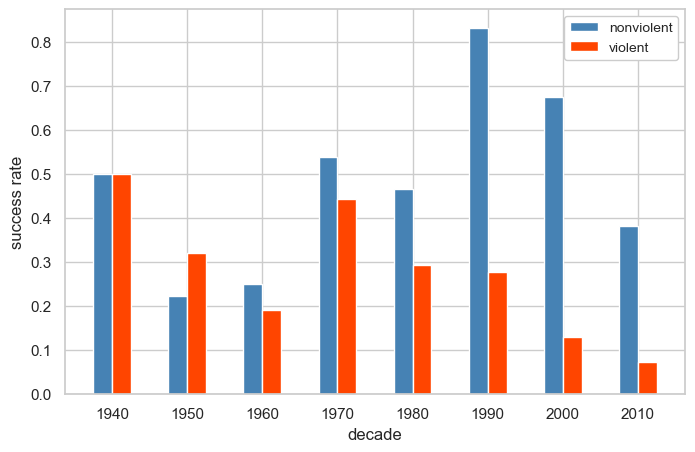

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(nonviolent_success['DECADE'] - width/2, nonviolent_success.SUCCESS_RATE, width, label='nonviolent', color='steelblue')
ax.bar(viol_success['DECADE'] + width/2, viol_success.SUCCESS_RATE, width, label='violent', color='orangered')
ax.set_xlabel('decade')
ax.set_ylabel('success rate')
ax.legend(fontsize=10).get_frame().set_alpha(1)

- It is evident that nonviolent methods have generally been more successful than violent ones and have seen increasing success rates till the 2000s.

In [10]:
viol_success.SUCCESS_RATE.mean(), nonviolent_success.SUCCESS_RATE.mean()

(0.27880269675915614, 0.48358904719198836)

- If we calculate the average success ratios we see that our results match Chenoweth's key finding that nonviolent campaigns were about twice as likely to succeed compared to violent campaigns.

## 2. Largest Resistance Campaigns, 1946-2014

***Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%. 
Investigate, outside the largest resistance campaigns, if you can find anything about Greece.***

- We keep the campaingns with:

$$\text{Percentage Popular Participation}\geq 0.2$$ 

In [11]:
largest_campaigns = navco[navco['PERCENTAGE POPULAR PARTICIPATION'] >= 0.02].copy()
largest_campaigns.sort_values(by='PERCENTAGE POPULAR PARTICIPATION', ascending=False).head(5)

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,DECADE
295,205,Slovenian independence,Slovenia,1990,1991,Yugoslavian rule,1,0,0,0,...,275,900000.0,0.450129,1,1,1.0,0.0,1,0,1990
14,33,pro-democracy movement,Argentina,1977,1983,military junta,1,0,0,0,...,2415,9000000.0,0.302013,1,0,1.0,0.0,1,0,1980
384,249,Zambian independence movement,Zambia,1961,1963,British rule,1,0,0,0,...,913,1000000.0,0.285063,0,1,0.0,0.0,0,0,1960
192,53,Cedar Revolution,Lebanon,2005,2005,Syrian forces,1,0,0,0,...,70,1000000.0,0.250824,1,0,0.0,1.0,1,0,2000
194,321,Lebanon Political Crisis,Lebanon,2006,2008,Government of Prime Minister Fouad Siniora,1,0,0,0,...,545,800000.0,0.194598,1,1,1.0,0.0,1,1,2000


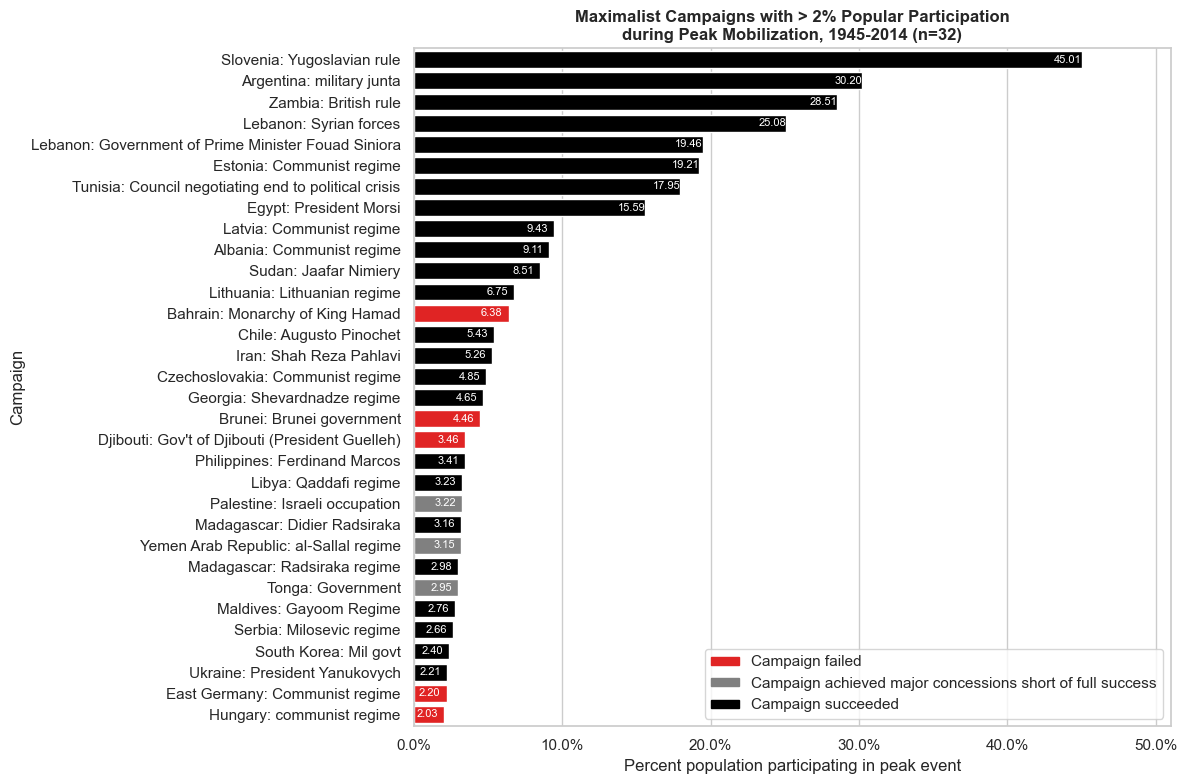

In [12]:
import matplotlib.patches as mpatches
from matplotlib.ticker import PercentFormatter

largest_campaigns = largest_campaigns.sort_values(by='PERCENTAGE POPULAR PARTICIPATION', ascending=True)

colors = ['black' if success == 1 else 'grey' if limited == 1 else '#e02424' for success, limited in zip(largest_campaigns['SUCCESS'], largest_campaigns['LIMITED'])]
  
legend_handles = [mpatches.Patch(color='#e02424', label='Campaign failed'),
                  mpatches.Patch(color='grey', label='Campaign achieved major concessions short of full success'),
                  mpatches.Patch(color='black', label='Campaign succeeded')]

plt.figure(figsize=(12, 8)) 
plt.legend(handles=legend_handles, loc='lower right',  handlelength=1.85,handleheight=0.45)
bars = plt.barh(largest_campaigns['LOCATION'] + ': ' + largest_campaigns['TARGET'], largest_campaigns['PERCENTAGE POPULAR PARTICIPATION'], color=colors)

plt.xlabel('Percent population participating in peak event')
plt.ylabel('Campaign')

plt.gca().xaxis.set_major_formatter(PercentFormatter(1, decimals=1))

for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval - 0.004 if xval < 0.1 else xval, yval, f'{(xval * 100):.2f}', va='center', ha='right', color='white', fontsize=8)

plt.title('Maximalist Campaigns with > 2% Popular Participation\nduring Peak Mobilization, 1945-2014 (n={})'.format(len(largest_campaigns)), fontweight='bold')
plt.margins(y=0.005)
plt.xlim(0, 0.51)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0)

- What about Greece?

In [13]:
navco[(navco.LOCATION == 'Greece') & (navco.SUCCESS == 1)]

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,DECADE
120,89,Greek anti-military,Greece,1973,1974,Military rule,1,0,0,0,...,654,2500.0,0.000279,1,1,1.0,0.0,1,0,1970


# Athens Polytechnic uprising

The Greek anti-military movement of 1973-1974 was a significant event in Greek history, characterized by a series of protests and uprisings against the military junta that ruled Greece from 1967 to 1974. The junta, also known as the Regime of the Colonels, was a right-wing military dictatorship that was characterized by policies such as anti-communism, restrictions on civil liberties, and the imprisonment, torture, and exile of political opponents.
The first major public action against the Greek junta came from students on February 21, 1973, when law students went on strike and barricaded themselves inside the buildings of the Law School of the University of Athens, demanding the repeal of the law that imposed forcible conscription.

<img src='media/polytechnic_uprising-1-1.jpg'>

The uprising that began on November 14, 1973, escalated to an open, anti-junta revolt and ended in bloodshed in the early morning of November 17th after a series of events, starting with a tank crashing through the gates of the Polytechnic . The Athens Polytechnic uprising was a massive student demonstration of popular rejection of the Greek military junta .
In response to the uprising, the junta imposed martial law and sent a tank crashing through the gates of the Athens Polytechnic. This resulted in the death of 24 civilians and hundreds of injuries.
The junta's rule was further undermined by the Turkish invasion of Cyprus, which led to a coup attempt by the hardliner Dimitrios Ioannidis. The coup was unsuccessful, and the junta fell on July 24, 1974, leading to the Metapolitefsi ("regime change") to democracy and the establishment of the Third Hellenic Republic.
The Greek legislative elections of 1974 were the first free elections held in a decade. A referendum held on December 8, 1974, rejected the re-establishment of the monarchy, and Greece became a republic.[(1)](https://en.wikipedia.org/wiki/Greek_junta),[(2)](https://en.wikipedia.org/wiki/Athens_Polytechnic_uprising)

## 3. The Effect of Participation on the Probability of Campaign Success

*Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.*
*Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis(explain it as best you can).*
*Then, do the same but with only the membership per capital as dependent variable(explain why its different than the previous one).*

- In order to run our logistic regression where `SUCCESS` is the dependent variable and `membership per capita` and `logged population` are our independent variables we firstly have to calculate the independent variables.

- From `NAVCO 1.2` documentation we see that:

$$ \text{Percentage Popular Participation} = \frac{\text{Participation}}{\text{Population}}\ $$


$$ \Rightarrow\text{Percentage Popular Participation} \cdot \text{Population} = \text{Participation} \ $$
    



$$ \Rightarrow\text{Population} = \frac{\text{Participation}}{\text{Percentage Popular Participation}} $$






In [14]:
navco['POPULATION'] = navco['PARTICIPATION'] / navco['PERCENTAGE POPULAR PARTICIPATION']

- From `NAVCO 1.1` documentation we see that membership per capita is also equal to:

$$ \text{Membership per capita} = \frac{\log(\text{Participation})}{\log(\text{Population)}}\ $$


In [15]:
navco['MEMPC'] =  np.log(navco['PARTICIPATION']) / np.log(navco['POPULATION'])

- Finally we calculate the logged population:

In [16]:
navco['LNPOP'] = np.log(navco['POPULATION'])

- And now we are ready to run our logistic regression.

In [17]:
from statsmodels.formula.api import logit

mdt = navco.dropna(subset=['MEMPC', 'LNPOP'])
success_model = logit("SUCCESS ~ MEMPC + LNPOP", mdt).fit()
success_model.summary2()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.130     
Date:               2023-12-04 21:17 AIC:              447.3747  
No. Observations:   380              BIC:              459.1952  
Df Model:           2                Log-Likelihood:   -220.69   
Df Residuals:       377              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      5.1893e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -2.8142    1.4961  -1.8811  0.0600  -5.7465  0.1180
MEMPC           7.6475    1.1664   6.5563  0.0000   5.3613  9.9336
LNPOP          -0.1388    0.0736  -1.8871  0.0591  -0.2830  0.0054
=================================================================

"""

After running logistic regression on the binary variable `SUCCESS`, we can infer the following:

- One unit increase in membership per capita (`MEMPC`) brings in an increase of $7.6475$ in the log odds of having a successful campaign; equivalently, the odds ratio increases by **$e^{7.6475} \approx 2095$** or about $209400\%$. While a 1 unit increase in membership per capita represents a huge increase in the odds of success according to the results, it's important to note that membership per capita most commonly falls between $0.36$ and $0.9$, so a change of 1 full unit is realistically unlikely. Even so, within the scope of this specific analysis, membership per capita stands out as the strongest indicator of its importance to a campaign's chances of success.
- One unit increase in location’s logged population the year the campaign ends (`LNPOP`) brings a decrease of $0.1388$ in the log odds of having a successful campaign; equivalently, the odds ratio decreases by **$e^{-0.1388} \approx 0.87$** or about $12.95\%$.
- The intercept is the log odds of having a successful campaign when all the independent variables are held at zero; that is $e^{-2.8142} \approx 0.059952$.That means that $p/(1-p) = 0.059952$, or $p \approx 0.056$.

- The predictor variable of `MEMPC` is significant for the determination of the campaign's success because its `p-value` is $0.0000$. Looking also at the `z-value` for the independent variable `MEMPC`, we can see that it is significantly high. This corroborates that `MEMPC` truly plays a meaningful role in impacting the dependent variable of success. However, the p-value for `LNPOP` ($0.0591$) is slightly greater than the common alpha level of $0.05$, which indicates that it is marginally significant.
- The `Pseudo R-squared` value is only $0.130$ indicating not a good fit for the logistic model.

Text(0, 0.5, 'Probability of Success')

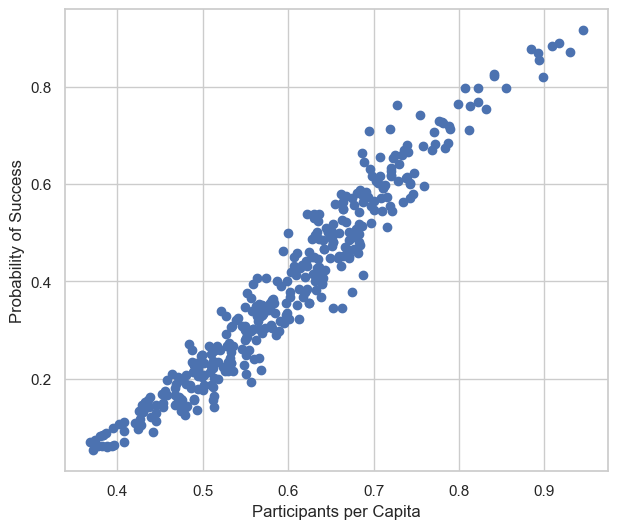

In [18]:
plt.figure(figsize=(7,6))
plt.scatter(mdt.MEMPC, success_model.predict())
plt.xlabel('Participants per Capita')
plt.ylabel('Probability of Success')

***Then, do the same but with only the membership per capital as dependent variable. Your plot should look like this (explain why is this different than the previous one):***

In [19]:
success_model2 = logit("SUCCESS ~ MEMPC", mdt).fit()
success_model2.summary2()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.123     
Date:               2023-12-04 21:17 AIC:              449.0222  
No. Observations:   380              BIC:              456.9026  
Df Model:           1                Log-Likelihood:   -222.51   
Df Residuals:       378              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      3.2041e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.3469    0.7095  -7.5362  0.0000  -6.7375  -3.9563
MEMPC          8.0495    1.1414   7.0524  0.0000   5.8125  10.2866
=================================================================

"""

After running logistic regression on the binary variable `SUCCESS`, with only `MEMPC` as independent variable, we can infer the following:

- One unit increase in `MEMPC` brings in an increase of $8.0495$ in the log odds of having a successful campaign; equivalently, the odds ratio increases by $e^{8.0495} \approx 3132$ or about $313122\% $(again a huge number).
- The intercept is the log odds of having a successful campaign when all the independent variables are held at zero; that is $e^{-5.3469} \approx 0.00476$.That means that $p/(1-p) = 0.00476$, or $p \approx 0.0047$.
- The predictor variable of `MEMPC` is significant for the determination of the campaign's success because its p-value is $0.0000$. Looking also at the `z-value` for the independent variable `MEMPC`, we can see that it is significantly high. 
- The `Pseudo R-squared` is only $0.123$ indicating not a good fit for the logistic model.

Text(0, 0.5, 'Probability of Success')

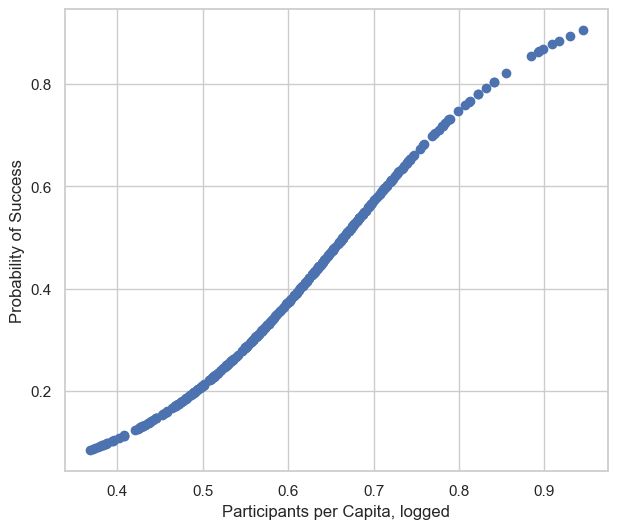

In [20]:
plt.figure(figsize=(7,6))
plt.scatter(mdt.MEMPC, success_model2.predict())
plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability of Success')

- If we compare the 2 model's scatterplots we see that first model's plot is more spase while the second model's plot is a more compact sigmoid line. There are a few key differences between the two models that cause their scatterplots to differ.

In [21]:
import scipy.stats.stats as stats

print('Pearson', stats.pearsonr(mdt.MEMPC, mdt.LNPOP))
print(stats.spearmanr(mdt.MEMPC, mdt.LNPOP))

Pearson PearsonRResult(statistic=-0.29385933268428416, pvalue=5.2542687516399715e-09)
SignificanceResult(statistic=-0.2556831281643881, pvalue=4.3725612332525346e-07)


C:\Users\malid\AppData\Local\Temp\ipykernel_28608\1315333506.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print('Pearson', stats.pearsonr(mdt.MEMPC, mdt.LNPOP))
C:\Users\malid\AppData\Local\Temp\ipykernel_28608\1315333506.py:4: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print(stats.spearmanr(mdt.MEMPC, mdt.LNPOP))


- Firstly, we found a weak negative relationship between `MEMPC` and `LNPOP`. Both the `Pearson` and `Spearman` correlations between `MEMPC` and `LNPOP` are negative, indicating an inverse relationship between the two variables. As `MEMPC` increases, `LNPOP` tends to decrease and vice versa. The `Pearson` correlation coefficient is `-0.259`, suggesting a weak negative linear relationship between `MEMPC` and `LNPOP`. The `p-value` associated with this correlation coefficient is significantly less than `0.05`, indicating that this correlation is statistically significant. The `Spearman` correlation coefficient is `-0.220`, suggesting a weak negative monotonic relationship between `MEMPC` and `LNPOP`. This means that while the relationship between `MEMPC` and `LNPOP` is not necessarily linear, the variables tend to move in opposite directions. The `p-value` associated with the `Spearman` correlation is also less than `0.05`, indicating that this correlation is statistically significant. This inverse relationship could be contributing to the differences in the scatterplots. In Model 1, `MEMPC` and `LNPOP` may be working against each other to some extent, leading to a more spread out scatterplot. In contrast, in Model 2, only `MEMPC` is considered, and its effect is not countered by `LNPOP`, resulting in a more compact scatterplot.

- Secondly, overall the number of independent variables in each model matters. Our first model uses two variables, `MEMPC` and `LNPOP`, to predict `SUCCESS`. The second model, however, only uses `MEMPC`. This additional variable in the first model adds another dimension to the data, causing the scatterplot to spread out more. Model 1 has a slightly higher `pseudo R-squared` value `(0.130)` compared to Model 2 `(0.123)`, suggesting that Model 1 explains a slightly greater proportion of the variability in the dependent variable.


## 4. The Level of Participation Tipping Point

***As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.***

***Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.***

In order to replicate the table found in [Questions, Answers, and Some Cautionary
Updates Regarding the 3.5% Rule](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf). we will:

- Define the bin edges (cuts) we want to group the participation percentages into and their labels.

- Use pandas cut() to bin the participation percentages column based on the bin edges and assign the bin label categories.

- Group the binned dataframe by the new bin category column(`Peak Popular Participation (%)`).

- Calculate the success rate within each bin by taking the sum of successful outcomes (`SUCCESS=1`) divided by the total number of observations in that bin.


In [22]:
df  = navco[['SUCCESS','PERCENTAGE POPULAR PARTICIPATION']].copy()
bins = [0, 0.000035, 0.00015, 0.0006, 0.0025, 0.01, 0.035, 1]
labels = ["less than 0.0035%", "0.0035% - 0.015%", "0.015% - 0.06%", "0.06% - 0.25%", "0.25% - 1.0%", "1.0% - 3.5%", "greater than 3.5%"]

df["Peak Popular Participation (%)"] = pd.cut(df["PERCENTAGE POPULAR PARTICIPATION"], bins=bins, labels=labels)

success_rates = df.groupby("Peak Popular Participation (%)").apply(lambda x: (x["SUCCESS"] == 1).sum() / len(x))

table = pd.DataFrame({
    "Peak Popular Participation (%)": success_rates.index,
    "Observations": df.groupby("Peak Popular Participation (%)").size(),
    "Success Rate": success_rates.apply(lambda x: '{:.2f}%'.format(100 * x))
})

table.sort_values(by='Success Rate', key=lambda col: col.str.rstrip('%').astype(float), ascending=False).reset_index(drop=True)

,Peak Popular Participation (%),Observations,Success Rate
0,greater than 3.5%,18,88.89%
1,1.0% - 3.5%,41,60.98%
2,0.25% - 1.0%,92,45.65%
3,0.06% - 0.25%,95,45.26%
4,0.015% - 0.06%,66,24.24%
5,0.0035% - 0.015%,44,9.09%
6,less than 0.0035%,24,4.17%


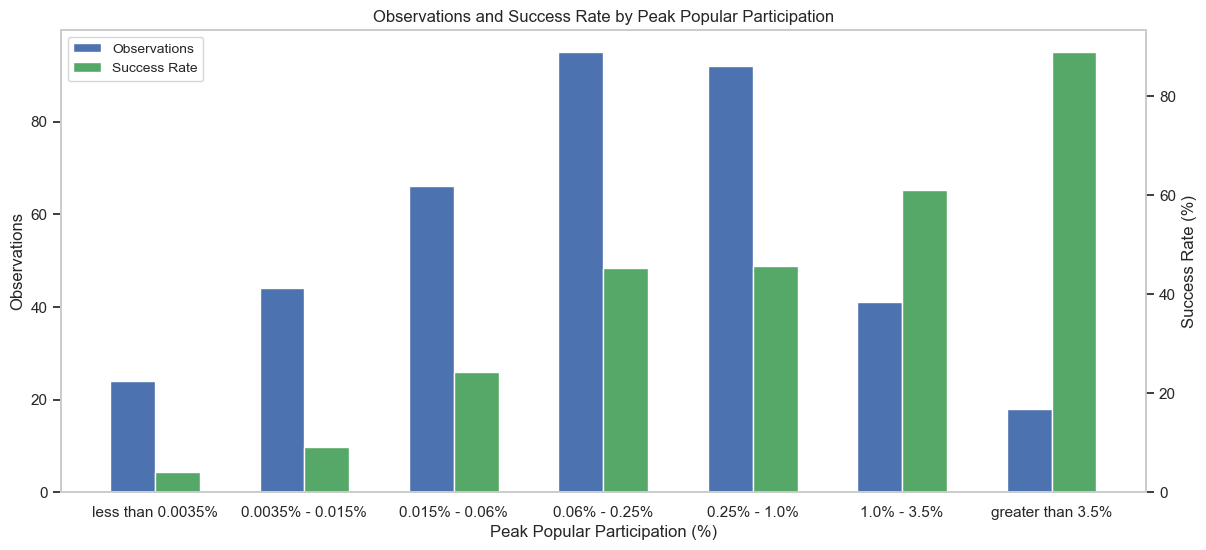

In [23]:
table['Success Rate'] = table['Success Rate'].str.rstrip('%').astype('float')

fig, ax1 = plt.subplots(figsize=(14, 6))
bar_width = 0.3
ind = np.arange(len(table))
ax1.bar(ind, table['Observations'], width=bar_width, color='b', label='Observations')
ax2 = ax1.twinx()
ax2.bar(ind + bar_width, table['Success Rate'], width=bar_width, color='g', label='Success Rate')
ax1.set_xlabel('Peak Popular Participation (%)')
ax1.set_ylabel('Observations')
ax2.set_ylabel('Success Rate (%)')
plt.title('Observations and Success Rate by Peak Popular Participation')
ax1.set_xticks(ind + bar_width / 2)
ax1.set_xticklabels(table['Peak Popular Participation (%)'])
fig.legend(loc='upper left', bbox_to_anchor=(0.125, 0.88), fontsize=10)
ax1.grid(False)
ax2.grid(False)

- As we see most of the campaigns had `Peak Popular Participation` in the range of `0.06 - 1%` and there is a tipping at 3.5%  Participation where success ratio exceeds 50%.  

Erica Chenoweth came up with the 3.5% rule based on extensive empirical research she conducted with collaborator Maria Stephan.
Chenoweth collected data on all major nonviolent and violent campaigns from 1900-2006 that aimed to overthrow a government or achieve territorial liberation and involved at least 1,000 participants.Through statistical analysis, they determined a participation threshold of 3.5% of the population seemed critical. Only few campaigns that achieved a participation level greater than 3.5% of the country's population failed(etc. uprising against King Hamad in Bahrain in 2011-2014). Interestingly, all campaigns surpassing this threshold were primarily nonviolent. Violent insurgencies on average involved participation levels far below this 3.5% mark. By identifying this 3.5% threshold, Chenoweth was able to empirically show a tipping point where critical mass is achieved to overcome the state's will and resources to resist change. Once participation in a nonviolent campaign grows beyond 3.5% nationwide, the data demonstrated it would succeed in achieving its goal of overthrowing the government or securing independence. For more insight into Chenoweth's findings on this critical participation threshold, see her 2013 talk ["The success of nonviolent civil resistance"](https://www.youtube.com/watch?v=YJSehRlU34w&t=496s) presented at TEDxBoulder.

***Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way. From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.***

- In order to find the percentage of the population that is the tipping point for success in a campaign with `99%` probability using one of our models we have to find the `MEMPC` (Participants per Capita, logged) value that corresponds to a success probability of `0.99`. However, our logistic regression models do not predict a success probability of `0.99` within the data range. This is where the confidence interval comes in handy.

- Confidence intervals are a range of values that are likely to contain the true parameter value. In the context of logistic regression, the confidence interval for a predicted probability provides a measure of uncertainty around the prediction.

- By plotting the confidence intervals in one of our models(we wiil use the second one), we can visually inspect the range of success probabilities that the model predicts with `95%` confidence. When the upper confidence interval intersects with the line of `0.99` probability, it indicates that, given the variability and uncertainty in the data, it is possible to observe a success probability of `0.99` at that particular `MEMPC` value.
- So lets plot the sigmoid line of the model with the confidence intervals:

Text(0, 0.5, 'Probability of Success')

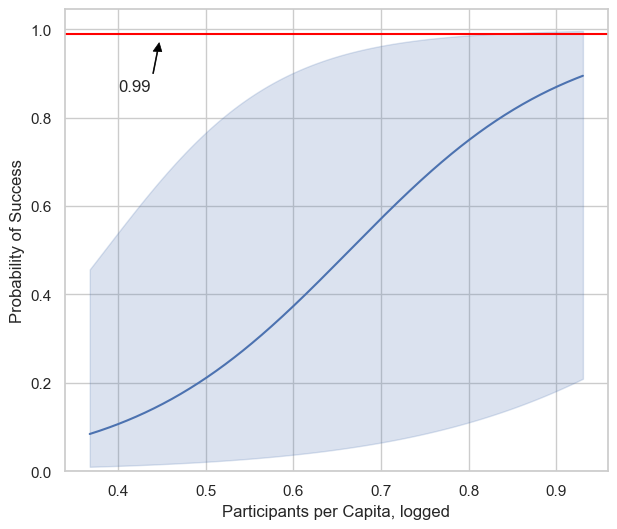

In [40]:
from scipy.special import expit

intercept = success_model2.params['Intercept']
mempc_coef = success_model2.params['MEMPC']
std_err_intercept = success_model2.bse['Intercept']
std_err_mempc = success_model2.bse['MEMPC']

mempc = np.linspace(mdt.MEMPC.min(), mdt.MEMPC.max(), 500)

sigmoid_func = expit(intercept + mempc_coef * mempc)

conf_interval_upper = expit(intercept + 1.96*std_err_intercept + (mempc_coef + 1.96*std_err_mempc) * mempc)
conf_interval_lower = expit(intercept - 1.96*std_err_intercept + (mempc_coef - 1.96*std_err_mempc) * mempc)

plt.figure(figsize=(7,6))
plt.plot(mempc, sigmoid_func, color='b')
plt.axhline(y=0.99, color='red', linestyle='-')
plt.fill_between(mempc, conf_interval_upper, conf_interval_lower, color='b', alpha=0.2)
plt.ylim(bottom=0)
plt.text(0.4, 0.87, '0.99', va='center',fontsize=12)
plt.arrow(0.44, 0.9, 0.005, 0.05, head_width=0.01, head_length=0.02, fc='black', ec='black', linewidth=0.5)
plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability of Success')

- From the plot we see that the upper confidence interval intersects with `0.99` probability when `MEMPC` is around `0.8`.
- Lets also calculate it:

In [25]:
diff = np.abs(conf_interval_upper - 0.99)
intersection_index = np.argmin(diff)
mempc_intersection = mempc[intersection_index]

print(f'The MEMPC point where the upper confidence interval intersects with 0.99 probability is {mempc_intersection}')

The MEMPC point where the upper confidence interval intersects with 0.99 probability is 0.8316129877061831


- Given that `MEMPC` is around 0.83  we can find the the percentage of the population that is the tipping point:
1. Just by looking at the campaigns that had `MEMPC` in the range `0.82 - 0.84`.

In [43]:
navco[(navco.MEMPC >= 0.81) & (navco.MEMPC <= 0.84)][['PERCENTAGE POPULAR PARTICIPATION','MEMPC']]

,PERCENTAGE POPULAR PARTICIPATION,MEMPC
63,0.054264,0.822027
80,0.048544,0.812648
158,0.052632,0.831294
201,0.067492,0.821769
266,0.034130,0.811163


- So, the percentage of the population that is the tipping point for success in a campaign with 99% probability is approxiamtely `5,2% - 6%`.

2. Using the definition of `MEMPC` and `PERCENTAGE POPULAR PARTICIPATION`.
-  We know that:

$$ MEMPC =\frac{log(PARTICIPATION)}{log(POPULATION)} \,(1)$$
$$ $$


- and: $$ PERCENTAGE\; \, POPULAR\; \,  PARTICIPATION = \frac{PARTICIPATION}{POPULATION} \,(2)$$
$$ $$ 
- If we try to solve $(1)$ in terms of   $ \; \frac{PARTICIPATION}{POPULATION}$ :
$$ $$ 

$$ MEMPC =\frac{log(PARTICIPATION)}{log(POPULATION)}$$

$$ \Leftrightarrow log(PARTICIPATION) =  MEMPC \cdot log(POPULATION)$$

$$ \Leftrightarrow e^{log(PARTICIPATION)} =  e^{MEMPC  \cdot  log(POPULATION)}$$ 

$$ \Leftrightarrow e^{log(PARTICIPATION)} = e^{log(POPULATION^{MEMPC})}$$ 

$$ \Leftrightarrow PARTICIPATION = POPULATION^{MEMPC}$$ 

$$ \Leftrightarrow \frac{PARTICIPATION}{POPULATION} = \frac{POPULATION^{MEMPC}}{POPULATION}$$

$$ \Leftrightarrow \frac{PARTICIPATION}{POPULATION} = POPULATION^{MEMPC-1}$$  

<small>$$ POPULATION >0 $$</small>
- Using $(2)$ we get that :

$$\fbox{$ PERCENTAGE\; \, POPULAR\; \, PARTICIPATION = POPULATION^{MEMPC-1}$}$$


- If we apply this relationship in our data populations and calculate the average percentage of them we get a number close to the findings of the first approach.

In [27]:
pp99 = navco[['POPULATION']].copy()
pp99['PP99%'] = (pp99['POPULATION'] ** (mempc_intersection - 1))
pp99['PP99%'].mean()

0.06336210665740762

## 5. Nonviolent Resistance and Target Regime Type

***Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.***

In [28]:
p5 = pd.read_excel('data/p5v2018.xls')
p5.head(5)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,...,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- In order to merge `NAVCO 1.2` dataset with `p5` we will use country and year columns.
- As we see from `NAVCO 1.1` target polity is: ***"the POLITY IV score of campaign target (democracy – autocracy) <u>1 year before campaign ends</u>"***. We saw before that Greek anti-military started in `1973`(during right-wing military dictatorship) and ended in `1974` where on December 8, 1974, Greek people rejected the re-establishment of the monarchy and Greece became a republic.

In [29]:
navco[(navco.LOCATION == 'Greece') & (navco.SUCCESS == 1)]

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,DECADE,POPULATION,MEMPC,LNPOP
120,89,Greek anti-military,Greece,1973,1974,Military rule,1,0,0,0,...,1,1,1.0,0.0,1,0,1970,8968520.0,0.488721,16.009231


In [42]:
p5[(p5.country == 'Greece') & ((p5.year == 1973) | (p5.year == 1974))][['country','year','polity2']]

,country,year,polity2
6043,Greece,1973,-7.0
6044,Greece,1974,1.0


- In our case we see that polity changed the same year the campaing ended. So in order to match the correct target polity in each campaign uisng `p5` dataset we are going to make a custom year column which is equal to campaing's `EYEAR - 1`. If we apply this in our previous example Greek anti-military campaign will have as target polity Greece's 1973 polity.

In [31]:
navco['py'] = navco['EYEAR'] - 1
navco_p = navco.merge(p5[['country', 'year', 'polity2']], left_on=['LOCATION', 'py'], right_on=['country', 'year'], how='left')
#navco_p.polity2.isna().sum()
navco_p[(navco_p.LOCATION == 'Greece') & (navco_p.SUCCESS == 1)][['CAMPAIGN','LOCATION','EYEAR','polity2']]

,CAMPAIGN,LOCATION,EYEAR,polity2
120,Greek anti-military,Greece,1974,-7.0


- Now that we matched each campaign with its correct corresponding polity score we can calculate the log of participation and run the logistic model:

In [32]:
navco_p['LPARTICIPATION'] = np.log(navco_p['PARTICIPATION'])    #np.log(navco_p['PERCENTAGE POPULAR PARTICIPATION']) 
mdt = navco_p.dropna(subset=['LNPOP','LPARTICIPATION','polity2','NONVIOL'])

success_model3 = logit("SUCCESS ~ polity2 + LPARTICIPATION + LNPOP + C(NONVIOL)", mdt).fit()
success_model3.summary2()

Optimization terminated successfully.
         Current function value: 0.547448
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.173     
Date:               2023-12-04 21:17 AIC:              327.5200  
No. Observations:   290              BIC:              345.8694  
Df Model:           4                Log-Likelihood:   -158.76   
Df Residuals:       285              LL-Null:          -191.98   
Converged:          1.0000           LLR p-value:      1.2787e-13
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          1.0448   1.5152  0.6895 0.4905 -1.9249  4.0145
C(NONVIOL)[T.1]    0.9817   0.2897  3.3886 0.0007  0.4139  1.5495
polity2           -0.0054   0.0242 -0.2221 0.8242 -0.0527  0.0420
LPARTICIPATION     0.4075   0.0887  4.5937 0.0000  0.2336  0.5814
LNPOP             -0.3679   0.1010 -3.6440 0.0003 -0.5658 -0.1700
=================================================================

"""

After running logistic regression on the binary variable `SUCCESS`, we can infer the following:

- One unit increase in `NONVIOL`(meaning the categorical variable is on in an on/off setting) brings in an increase of $0.9817$ in the log odds of having a successful campaign; equivalently, the odds ratio increases by **$e^{0.9817} \approx 2.668$** or about $166.89\%$. 
- One unit increase in `polity2` brings a decrease of $0.0054$ in the log odds of having a successful campaign; equivalently, the odds ratio decreases by **$e^{-0.0054} \approx 0.99$** or about $0.53\%$.
- One unit increase in location’s logged population the year the campaign ends (`LNPOP`) brings a decrease of $0.3679$ in the log odds of having a successful campaign; equivalently, the odds ratio decreases by **$e^{-0.3679} \approx 0.69$** or about $30.78\%$.
- One unit increase in the log of participation(`LPARTICIPATION`) brings a increase of $0.4075$ in the log odds of having a successful campaign; equivalently, the odds ratio decreases by **$e^{0.4075} \approx 1.5$** or about $50.3\%$.
- The intercept is the log odds of having a successful campaign when all the independent variables are held at zero; that is $e^{1.0448} \approx 2.84$.That means that $p/(1-p) = 2.84$, or $p \approx 0.73$.
- The `Pseudo R-squared` value is $0.203$ indicating a very good fit for the logistic model.

Now lets make a scatterplot with polity score in the x-axis and predicted probability of success in the y-axis. 

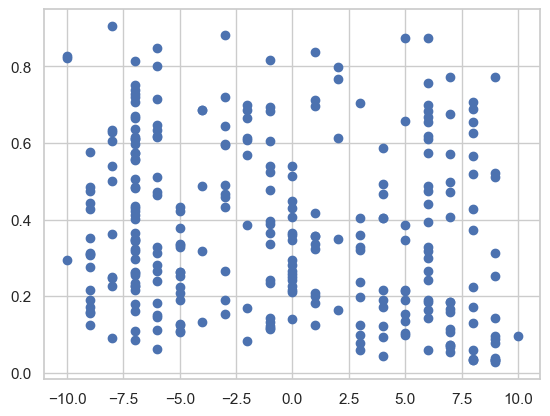

In [33]:
_ = plt.scatter(mdt.polity2, success_model3.predict())

- To make things more clear we are going to use patches to highlight the campaigns with high probability of success.We will use a red(red color was historically associated with autocratic polities) patch to highlight the campaigns under autocratic polity, a green(linked with democratic polities) one to highlight the campaigns under democratic polity and a yellow one to highlight the campaigns under interregnum, or anarchy.

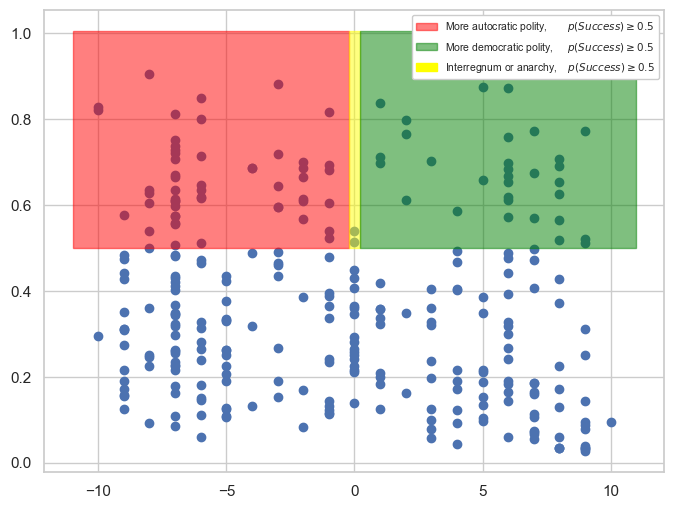

In [34]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(mdt.polity2, success_model3.predict())
xmin, xmax = mdt.polity2.min() - 1, mdt.polity2.max() + 1
ymin, ymax = success_model3.predict().min() + 0.1, success_model3.predict().max() + 0.1
ax.add_patch(mpatches.Rectangle((xmin, 0.5), 0-xmin-0.2,ymax-0.5, color='red', alpha=0.5))
ax.add_patch(mpatches.Rectangle((-0.2,0.5), 0.4, ymax-0.5, color='yellow',alpha=0.5))
ax.add_patch(mpatches.Rectangle((0.2,0.5), xmax-0.2,ymax-0.5, color='green', alpha=0.5))
legend_red = mpatches.Patch(color='red', alpha=0.5, label=r'More autocratic polity,       $p(Success)\geq 0.5$')
legend_green = mpatches.Patch(color='green', alpha=0.5, label=r'More democratic polity,     $p(Success)\geq 0.5$')
legend_yellow = mpatches.Patch(color='yellow', label=r'Interregnum or anarchy,    $p(Success)\geq 0.5$')
ax.legend(loc='upper right', fontsize=7.5, handles=[legend_red, legend_green,legend_yellow]).get_frame().set_alpha(1)

- As we see most of the campaigns with high success probability were when target polity was more autocratic, more specifically:

In [35]:
print(f"Number of campaigns with high success probability vs autocratic target polity: {sum((mdt.polity2 < 0) & (success_model3.predict() >= 0.5))}")
print(f"Number of campaigns with high success probability vs democratic target polity: {sum((mdt.polity2 > 0) & (success_model3.predict() >= 0.5))}")

Number of campaigns with high success probability vs autocratic target polity: 53
Number of campaigns with high success probability vs democratic target polity: 31


- If we add patches for the campaigns with low success probability we still wont be able to see the difference with unaided eye.So lets count them:

In [36]:
print(f"Number of campaigns with low success probability vs autocratic target polity: {sum((mdt.polity2 < 0) & (success_model3.predict() < 0.5))}")
print(f"Number of campaigns with low success probability vs democratic target polity: {sum((mdt.polity2 > 0) & (success_model3.predict() < 0.5))}")

Number of campaigns with low success probability vs autocratic target polity: 100
Number of campaigns with low success probability vs democratic target polity: 88


- Same story, most of the campaigns with low success probability were when target polity was more autocratic.
- Did we forget something?

In [37]:
print(f"Number of campaigns with high success probability under interregnum, or anarchy: {sum((mdt.polity2 == 0) & (success_model3.predict() >= 0.5))}")
print(f"Number of campaigns with low success probability under interregnum, or anarchy: {sum((mdt.polity2 == 0) & (success_model3.predict() < 0.5))}")

Number of campaigns with high success probability under interregnum, or anarchy: 2
Number of campaigns with low success probability under interregnum, or anarchy: 16


In conclusion, we see that the significance of the nonviolent indicator persists regardless of the nature of the regime in control. Similarly, the number of people participating in the campaign continues to be a crucial factor, enhancing the chances of success.
Hence, the type of opposition, be it democratic or autocratic, appears to have little impact on the successful outcome of nonviolent movements. Finally it is worth mentioning the fact that most of the campaigns occured when target polity was autocratic and that a big proportion of them had high probability of success.